Basic expected compentencies
1. Decay to resting potential


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

{'archiver_length': 0, 'beta_Ca': 0.001, 'C_m': 250.0, 'Ca': 0.0, 'E_L': -70.0, 'element_type': 'neuron', 'frozen': False, 'global_id': 1, 'I_e': 0.0, 'local': True, 'model': 'iaf_psc_alpha', 'model_id': 46, 'node_uses_wfr': False, 'post_trace': 0.0, 'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'), 'synaptic_elements': {}, 't_ref': 2.0, 't_spike': -1.0, 'tau_Ca': 10000.0, 'tau_m': 10.0, 'tau_minus': 20.0, 'tau_minus_triplet': 110.0, 'tau_syn_ex': 2.0, 'tau_syn_in': 2.0, 'thread': 0, 'thread_local_id': -1, 'V_m': -55.0, 'V_min': -inf, 'V_reset': -70.0, 'V_th': -55.0, 'vp': 0}

Nov 22 17:36:42 NodeManager::prepare_nodes [Info]: 
    Preparing 2 nodes for simulation

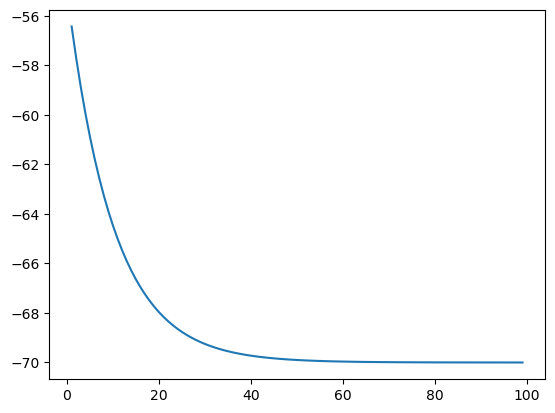

In [1]:
import numpy as np
import nest
import matplotlib.pyplot as plt

V_m = -55.0
E_L = -70.0
tau_m = 10

lif_neuron = nest.Create('iaf_psc_alpha', 1)
lif_neuron.set({'V_m': V_m, 'tau_m': tau_m, 'E_L': E_L})
print(lif_neuron.get())
vm_monitor = nest.Create('multimeter')
vm_monitor.set(record_from=['V_m'])

nest.Connect(vm_monitor, lif_neuron)

nest.Simulate(100.0)

dmm = vm_monitor.get()
Vms = dmm['events']['V_m']
ts = dmm['events']['times']

plt.plot(ts, Vms)

nest.ResetKernel()


Nov 22 17:36:42 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Nov 22 17:36:42 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 300
    Number of OpenMP threads: 1
    Not using MPI

Nov 22 17:36:42 SimulationManager::run [Info]: 
    Simulation finished.


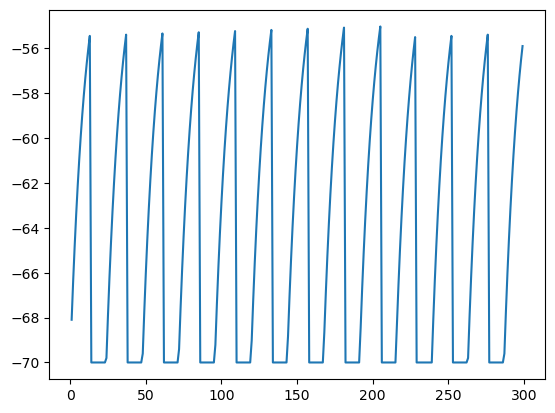

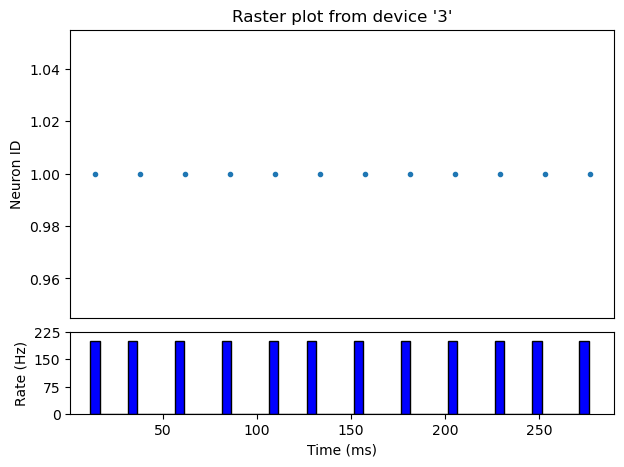

In [2]:
import numpy as np
import nest
import matplotlib.pyplot as plt

t_ref = 10
I_e = 500

lif_neuron = nest.Create('iaf_psc_alpha', 1)
lif_neuron.set({'t_ref': t_ref, 'I_e': I_e})
vm_monitor = nest.Create('multimeter')
vm_monitor.set(record_from=['V_m'])
spike_monitor = nest.Create('spike_recorder')

nest.Connect(vm_monitor, lif_neuron)
nest.Connect(lif_neuron, spike_monitor)

nest.Simulate(300.0)

dmm = vm_monitor.get()
Vms = dmm['events']['V_m']
ts = dmm['events']['times']

plt.plot(ts, Vms)
nest.raster_plot.from_device(spike_monitor, hist=True)
nest.ResetKernel()